# **Classification based predictive model for absenteeism of employees at work**

* Employees with low performance cause a vital lose for organizations and the absenteeism consider to be one of the factors that affect performance So, understanding the causes of absenteeism may power the organization with a competitive advantages tool and open the area of research for computer and human resources fields. 
* The aim of this analysis is to discover the factors and causes of employees absence using computerized technologies.
* Original dataset is available at https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

![Employees](http://bbrc.in/bbrc/wp-content/uploads/2019/02/fig1_opt-7.jpeg)

# 1. Import and Clean Data
>The first step is to import and clean the data for analysis. The process of cleaning might vary based on the quality and size of the dataset.

In [1]:
pip install treeinterpreter

Note: you may need to restart the kernel to use updated packages.


> Allows decomposing each prediction into `bias` and `feature contribution` components as described in http://blog.datadive.net/interpreting-random-forests/

In [2]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#from statsmodels.graphics import tsaplots
#import statsmodels.api as sm
import seaborn as sns
import numpy as np
#import calendar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error as MSE
#from scipy.stats import spearmanr, pearsonr
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.cluster import hierarchy as hc
import scipy
from treeinterpreter import treeinterpreter as ti
from collections import Counter

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
df =  pd.read_excel('../input/Absenteeism_at_work_new.xls')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    int64  
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

> The above results shows that this dataset has just 740 rows with the size of 122 KB. One of the column "Work load Average/day" has forward slash and we are replacing to avoid unnecessary errors in future.

In [6]:
df.columns = df.columns.str.replace('/', 'per').str.strip()

> Let us check the data quickly to understand the contents. ID is the unique employee id in the dataset. The below command returns the count of rows for each ID from the dataset.

In [7]:
df.groupby('ID')[['ID']].count().head()

,ID
ID,
1,23
2,6
3,113
4,1
5,19


> The above results shows that this dataset is not a regular attendence dataset. This dataset only has absent hours of the employees for the period.

> First step in the cleaning of the dataset is to change the appropriate data types of the columns.

In [8]:
len(df.columns)

23

In [9]:
df.shape

(740, 23)

## 1.1 Manually setting up the data types of certain variables for EDA purpose

In [10]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Unnamed: 21,Unnamed: 22
0,11,26,7,3,1,289,36,13,33,239554,...,2,1,0,1,90,172,30,4,NaN,NaN
1,36,23,7,3,1,118,13,18,50,239554,...,1,1,0,0,98,178,31,6,NaN,NaN
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,0,89,170,31,2,NaN,NaN
3,7,7,7,5,1,279,5,14,39,239554,...,2,1,1,0,68,168,24,4,NaN,NaN
4,11,23,7,5,1,289,36,13,33,239554,...,2,1,0,1,90,172,30,2,NaN,NaN


In [11]:
df['Social drinker'] = df['Social drinker'].astype('bool')
df['Social smoker'] = df['Social smoker'].astype('bool')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('bool')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Averageperday          740 non-null    int64   
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    bool    
 12  Educatio

> After changing the datatype of few columns you can notice the size of the dataset reduced from 122KB to 84KB.
The next step is to check whether there is any missing values in the dataset.

In [13]:
df.isnull().sum()

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               0
Distance from Residence to Work      0
Service time                         0
Age                                  0
Work load Averageperday              0
Hit target                           0
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                               0
Body mass index                      0
Absenteeism time in hours            0
Unnamed: 21                        739
Unnamed: 22                        739
dtype: int64

> Looks like there is no missing value in the dataset. Now we have to check the valid values in the dataset. There is no specific logic to this process. If there is any datetime value, need to check invalid date time values. If there are numeric values, need to check the outliers. Check the distribution of values etc.,

In [14]:
df['Absenteeism time in hours'].describe

<bound method NDFrame.describe of 0      4
1      6
2      2
3      4
4      2
      ..
735    8
736    4
737    4
738    8
739    4
Name: Absenteeism time in hours, Length: 740, dtype: int64>

In [15]:
df[df['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Unnamed: 21,Unnamed: 22
737,4,23,0,3,1,118,14,13,40,271219,...,1,True,False,8,98,170,34,4,NaN,NaN
738,8,23,0,4,2,231,35,14,39,271219,...,2,True,False,2,100,170,35,8,NaN,NaN
739,35,23,0,6,3,179,45,14,53,271219,...,1,False,False,1,77,175,25,4,NaN,NaN


> Now let us check the invalid values in the target variable.

In [16]:
df[df['Reason for absence']==27][['Absenteeism time in hours']].mean()

Absenteeism time in hours    2.362319
dtype: float64

> We can see the mean value for Reason 27 and let us update Absenteeism hours as 3 for this row.

In [17]:
df.loc[(df['Reason for absence']==27) & (df['Absenteeism time in hours']==0),'Absenteeism time in hours']=3

>After updating the value for the above row, now we can update Absenteeism in hours as 8 for all the rows with Disciplinary failure.

In [18]:
df.loc[(df['Absenteeism time in hours']==0),'Absenteeism time in hours']=8

In [19]:
len(df[df['Absenteeism time in hours']==8])

221

In [20]:
dd = df[df['Absenteeism time in hours']==8]

In [21]:
dd['Reason for absence'].mode()

0    22
Name: Reason for absence, dtype: category
Categories (27, int64): [1, 2, 3, 4, ..., 25, 26, 27, 28]

>We performed some data cleaning in excel which are not specified here

>But if you need the cleaned dataset use this one =>=>=> https://www.kaggle.com/miracle9to9/absenteeism-dataset

>After checking the zero values in Absenteeism in hours column, let us get ready for Exploratory Data Analysis. It's better to add additional columns for visualization as this dataset has only numeric values.

In [22]:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
df['season_name'] = df.Seasons.map(season_mapping)
df['season_name'] = df['season_name'].astype('category')
df.drop_duplicates(['Seasons', 'season_name'])[['Seasons','season_name']]

,Seasons,season_name
0,1,Summer
49,4,Spring
111,2,Autumn
175,3,Winter


>The above will have Season Name along with Season and the below command will have Month names.

In [23]:
import calendar
df['month_name'] =  df['Month of absence'].apply(lambda x: calendar.month_abbr[x])

In [24]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
df['reason_text'] = df['Reason for absence'].map(reason_mapping)

> The above reason is available in the UCI data description document and the below will update the education.

In [25]:
education_mapping = {
    1: 'High School',
    2: 'Graduate',
    3: 'Post Graduate',
    4: 'Master & Doctor'
}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
df['Education_detail'] = df['Education'].map(education_mapping)
#df['Education_detail'] = df['Education_detail'].astype('category')
category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
df['Education_detail'] = df['Education_detail'].astype(category_education)

>After adding new columns for the reference columns, let us quickly check the first 5 rows from the dataset.

In [26]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Weight,Height,Body mass index,Absenteeism time in hours,Unnamed: 21,Unnamed: 22,season_name,month_name,reason_text,Education_detail
0,11,26,7,3,1,289,36,13,33,239554,...,90,172,30,4,NaN,NaN,Summer,Jul,Unjustified absence,High School
1,36,23,7,3,1,118,13,18,50,239554,...,98,178,31,6,NaN,NaN,Summer,Jul,Medical consultation,High School
2,3,23,7,4,1,179,51,18,38,239554,...,89,170,31,2,NaN,NaN,Summer,Jul,Medical consultation,High School
3,7,7,7,5,1,279,5,14,39,239554,...,68,168,24,4,NaN,NaN,Summer,Jul,Diseases of the eye and adnexa,High School
4,11,23,7,5,1,289,36,13,33,239554,...,90,172,30,2,NaN,NaN,Summer,Jul,Medical consultation,High School


# 2. Exploratory Data Analysis

### 2.1 Agewise Employee Count

>Let us check the employee counts by Age. Notice one minor hack to count the unique IDs. As the employee count are almost similar, we are not able to decipher much.

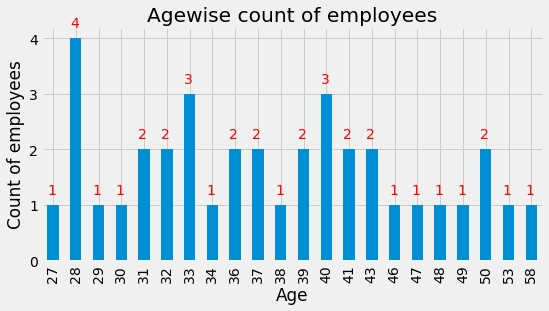

In [27]:
age_count = df.groupby(['Age']).agg({'ID': pd.Series.nunique})
ax = age_count.plot(kind='bar', figsize=(8,4), legend=False)
for i, v in enumerate(age_count.values):
    ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Count of employees')
ax.set_title('Agewise count of employees')
plt.show()

### 2.2 Educationwise Employee Count

> The below graph shows that High School educated employees are higher than the rest.

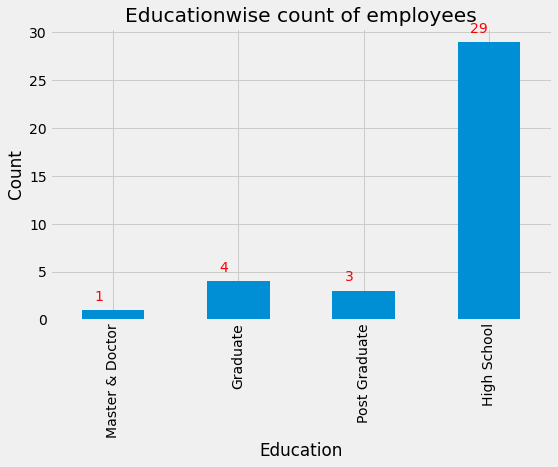

In [28]:
edu_count = df.groupby(['Education_detail']).agg({'ID': pd.Series.nunique})
ax = edu_count.plot(kind='bar', figsize=(8,5), legend=False)
for i, v in enumerate(edu_count.values):
    ax.text(i-.15, v + 1, str(v[0]), color='red')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Educationwise count of employees')
plt.show()

### 2.3 Average work load by Age

>The work load seems to be same irrespective of the age.

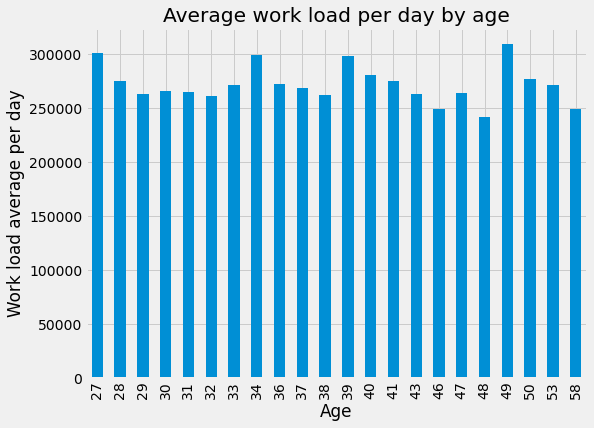

In [29]:
age_work_sum = df.groupby('Age', as_index=False)[['Work load Averageperday']].mean()
ax = age_work_sum.plot(kind='bar', x='Age', figsize=(8,6), legend=False)
ax.set_ylabel('Work load average per day')
ax.set_title('Average work load per day by age')
plt.show()

### 2.4 Average Absenteeism hours by Age

>Absenteeism seems to be same across Age except for one age.

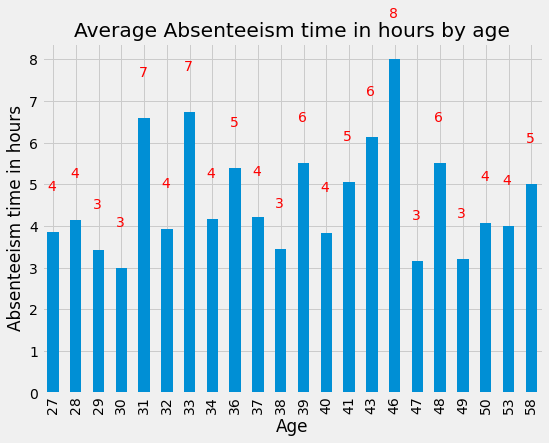

In [30]:
age_abs = df.groupby('Age')[['Absenteeism time in hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by age')
plt.show()

### 2.5 Average Absenteeism hours by Distance to work

>The hypothesis i have was that if the distance to work increase the absenteeism hours will increase. But the below graph nullifies my hypothesis.

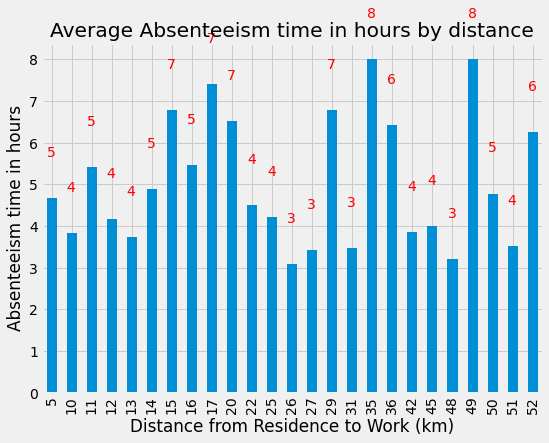

In [31]:
dis_abs = df.groupby('Distance from Residence to Work')[['Absenteeism time in hours']].mean()
ax = dis_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(dis_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Distance from Residence to Work (km)')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by distance')
plt.show()

### 2.6 Average distance to work by Age

>Another hypothesis I had was that higher age employees might stay closer to the office. It might be true till the Age 33, but the other values are not significant to compare.

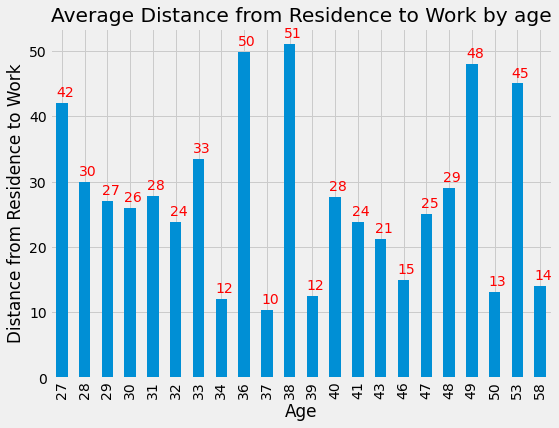

In [32]:
age_dis = df.groupby('Age')[['Distance from Residence to Work']].mean()
ax = age_dis.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_dis.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Distance from Residence to Work')
ax.set_title('Average Distance from Residence to Work by age')
plt.show()

### 2.7 Average Transportation expense by Distance

>The transportation expense is not increasing by distance but we don't have transport mode, so this is not helping us.

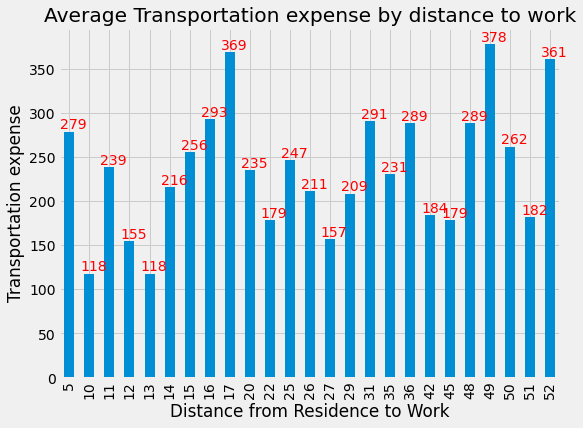

In [33]:
dis_exp = df.groupby('Distance from Residence to Work')[['Transportation expense']].mean()
ax = dis_exp.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(dis_exp.values):
    ax.text(i-.45, v + 3, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Transportation expense')
ax.set_title('Average Transportation expense by distance to work')
plt.show()

### 2.8 Pet & Son counts by Age

>The below graph shows that the employees who has Son are mostly having a pet. This is interesting.

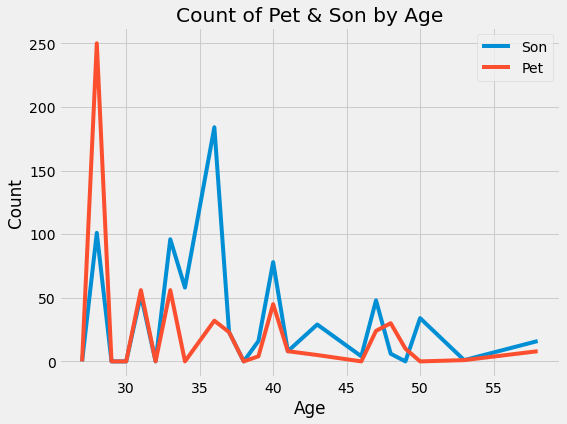

In [34]:
ax = df.groupby('Age')['Son', 'Pet'].sum().plot(figsize=(8,6))
ax.set_ylabel('Count')
ax.set_title('Count of Pet & Son by Age')
plt.show()

### 2.9 Smoker & Drinker Stats

>How much percentage of Social Drinkers are Social Smokers also?

In [35]:
# % of Social drinker those are smokers
emp_social = df.drop_duplicates(['ID', 'Social drinker', 'Social smoker'])[['ID', 'Social drinker', 'Social smoker']]
emp_social[emp_social['Social drinker']==True]['Social smoker'].mean()

0.21052631578947367

>How much percentage of Social Smokers are Social Drinkers also?

In [36]:
# % of Social smokers are drinkers
emp_social[emp_social['Social smoker']==True]['Social drinker'].mean()

0.5714285714285714

### 2.10 Absenteeism by Social habits

>Looks like 60% of Social drinkers are absent and interestingly 32% of Non-smoker & Non-drinker are also absent.

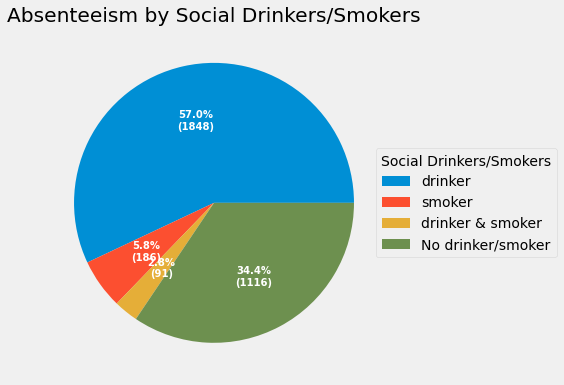

In [37]:
drink_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
smok_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
drink_smok_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
abs_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')
#plt.pie(absen, labels=pie_labels)
plt.show()


### 2.11 Absenteeism by Reason

>The below table shows the highest Abseenteeism hours to lowest by Reason. The data is from courier company and the employees needs to deliver the packages and the Top 2 reason for absence shows that.
There is one hack to hide the index column.

In [38]:
reason_abs = df.groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(reason_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
Medical consultation,642
Dental consultation,305
Diseases of the musculoskeletal system and connective tissue,290
Patient follow-up,283
"Injury, poisoning and certain other consequences of external causes",243
Unjustified absence,228
Diseases of the respiratory system,166
Physiotherapy,163
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",142
Diseases of the digestive system,126


### 2.12 Absenteeism hours by Seasons

>Looks like winter has highest Absenteeism.

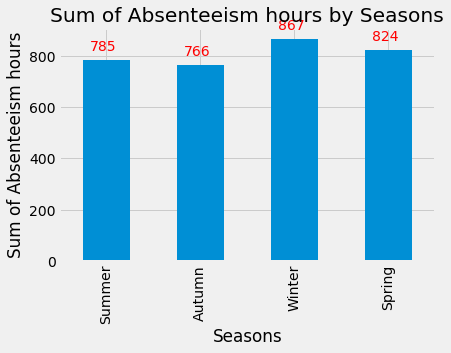

In [39]:
season_abs = df.groupby('season_name')['Absenteeism time in hours'].sum()
ax = season_abs.plot(kind='bar', figsize=(6,4), legend=False)
for i, v in enumerate(season_abs.values):
    ax.text(i-.17, v + 35, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Seasons')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Seasons')
plt.show()

### 2.13 Absenteeism hours by Month

>Getting to detail from Seasons to Month, Looks like March & July has the highest number of Absenteeism hours.

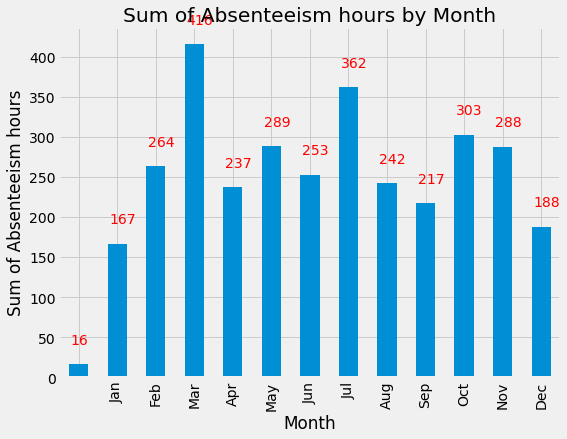

In [40]:
month_abs = df.groupby('month_name')['Absenteeism time in hours'].sum()
ax = month_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(month_abs.values):
    ax.text(i-0.2, v + 25, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Month')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Month')
plt.show()

### 2.14 March month Absenteeism hours by Reason

>Let us check the March month reason.

In [41]:
mar_abs = df[df['Month of absence']==3].groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(mar_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
Diseases of the musculoskeletal system and connective tissue,61
Patient follow-up,56
Medical consultation,54
"Injury, poisoning and certain other consequences of external causes",43
Physiotherapy,41
Dental consultation,33
Diseases of the digestive system,26
Diseases of the genitourinary system,23
Laboratory examination,13
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",8


### 2.15 July month Absenteeism hours by Reason

>Looks like the March month & July month reasons are not matching.

In [42]:
jul_abs = df[df['Month of absence']==7].groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(jul_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
Patient follow-up,62
Unjustified absence,56
Certain infectious and parasitic diseases,40
Medical consultation,34
"Injury, poisoning and certain other consequences of external causes",23
Diseases of the digestive system,21
Dental consultation,18
Laboratory examination,17
Diseases of the genitourinary system,16
Diseases of the musculoskeletal system and connective tissue,16


# 3. Train and Test Split

In [43]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Weight,Height,Body mass index,Absenteeism time in hours,Unnamed: 21,Unnamed: 22,season_name,month_name,reason_text,Education_detail
0,11,26,7,3,1,289,36,13,33,239554,...,90,172,30,4,NaN,NaN,Summer,Jul,Unjustified absence,High School
1,36,23,7,3,1,118,13,18,50,239554,...,98,178,31,6,NaN,NaN,Summer,Jul,Medical consultation,High School
2,3,23,7,4,1,179,51,18,38,239554,...,89,170,31,2,NaN,NaN,Summer,Jul,Medical consultation,High School
3,7,7,7,5,1,279,5,14,39,239554,...,68,168,24,4,NaN,NaN,Summer,Jul,Diseases of the eye and adnexa,High School
4,11,23,7,5,1,289,36,13,33,239554,...,90,172,30,2,NaN,NaN,Summer,Jul,Medical consultation,High School


>After using the FeatureImportance attribute of RandomForest, We removed four columns from df_features that are Season, Social_smoker, Social Drinker, Education 

>This is the challenge in the small dataset. We changed the target variable as Classification

>The target variable is Absenteeism in hours. Let us change to classification, so the multiclass variable is '=<4' as '0' and '>4' as '1'. This is just random assumption that employee absence can be half day, full day or more......

In [44]:
bins = [25, 35, 45, 55, np.inf]
names = [25, 35, 45, 55]
df['age_range'] = pd.cut(df['Age'], bins, labels=names)

In [45]:
abs_bins = [0, 4, np.inf]
abs_names = ['0', '1']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)

In [46]:
df_features = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Transportation expense', 
        'Distance from Residence to Work', 'Service time', 'age_range', 'Work load Averageperday', 'Hit target',
        'Disciplinary failure', 'Son', 'Pet', 'Weight', 
        'Height', 'Body mass index']]

>After using the FeatureImportance atttribute of RF Classifier we removed four columns from our df_features they are season, social_smoker, social_drinker, eduaction to increase accuracy.

# 3.3 ML Model
>Let us split the data

In [47]:
X = df_features
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

>Gaussian Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
y_pred_nb = gnb.predict(X_test) 
  
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       143
           1       0.59      0.48      0.53        79

    accuracy                           0.70       222
   macro avg       0.67      0.65      0.65       222
weighted avg       0.69      0.70      0.69       222



>AdaBoost Classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=5)
clf.fit(X_train, y_train)

y_pred_adb = clf.predict(X_test)

print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       143
           1       0.59      0.66      0.62        79

    accuracy                           0.72       222
   macro avg       0.69      0.70      0.70       222
weighted avg       0.72      0.72      0.72       222



>GradientBoost Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=5, random_state=0)
clf.fit(X_train, y_train)
y_pred_gdb = clf.predict(X_test)


print(classification_report(y_test, y_pred_gdb))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       143
           1       0.74      0.37      0.49        79

    accuracy                           0.73       222
   macro avg       0.74      0.65      0.65       222
weighted avg       0.73      0.73      0.70       222



>RandomForest Classifier

In [51]:
model = RandomForestClassifier(n_estimators=300, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train)

y_pred_rf = model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       143
           1       0.63      0.72      0.67        79

    accuracy                           0.75       222
   macro avg       0.73      0.75      0.74       222
weighted avg       0.76      0.75      0.76       222



### ***Feature Importance (Important features that recognised by the RF model)***
>This is one way of interpreting the Random Forest Model and we can see the contributions from the features. This is at high level we can understand the importance of features.

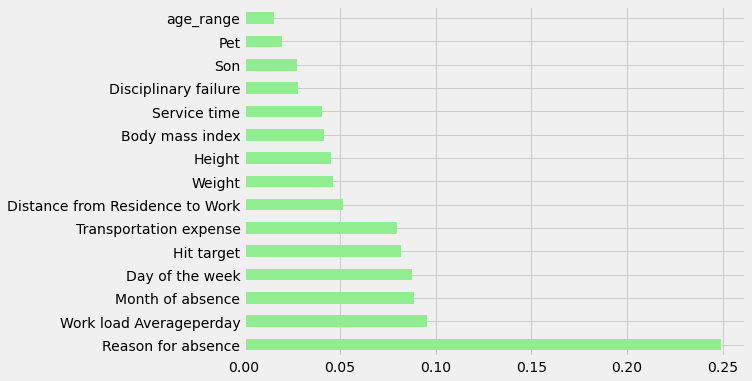

In [52]:
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='lightgreen'))
plt.show()

# **3.4 Hyper Parameter tuning with Cross Validation**
>Hyper parameter tuning is a process is to change the parameters of the model and identify which parameter gives us the better accuracy. The cross validation in Grid & Random Search helps us to use Stratified K-fold to create validation set within trained data. The CV value 5 or above uses Stratified K-fold.

### **RandomSearchCV**

In [53]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap' : bootstrap
              }

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
      

In [54]:
# The below will provide us the best parameters from the Random Search CV.

rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

>Let us use the above model to predict & evaluate.

In [55]:
from sklearn.ensemble import RandomForestClassifier
model_random = rf_random.best_estimator_
model_random.fit(X_train, y_train)
predictions_random = model_random.predict(X_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_random))

Accuracy: 0.7522522522522522


In [57]:
print(classification_report(y_test, predictions_random))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       143
           1       0.64      0.68      0.66        79

    accuracy                           0.75       222
   macro avg       0.73      0.74      0.73       222
weighted avg       0.76      0.75      0.75       222



In [58]:
metrics.f1_score(y_test, predictions_random, average='micro')

0.7522522522522523

> Let us check the train & test data for each classification.

In [59]:
from collections import Counter

In [60]:
Counter(y_train)

Counter({'0': 321, '1': 197})

In [61]:
Counter(y_test)

Counter({'0': 143, '1': 79})

>The above value shows that there are less values in the test/validation set.

>The random search gives us the range of the values and using that We can do the Grid Search to tune the model with exact parameters.

### **GridSearch**

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [8, 10, 12, 14],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1, 3, 4],
    'min_samples_split' : [7, 10, 12],
    'n_estimators' : [250, 275, 300, 325]
    
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, n_jobs = -1, error_score=np.nan, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [8, 10, 12, 14],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [7, 10, 12],
                         'n_estimators': [250, 275, 300, 325]},
             verbose=2)

In [63]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 300}

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_grid = grid_search.best_estimator_
model_grid.fit(X_train, y_train)
predictions_grid = model_grid.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print(classification_report(y_test, predictions_grid)) # Random_Forest

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       143
           1       0.64      0.68      0.66        79

    accuracy                           0.75       222
   macro avg       0.73      0.73      0.73       222
weighted avg       0.75      0.75      0.75       222



# 4. **Interpreting the Model**
>The most common problem we have is to justify the predictions. Why the model has predicted in a way? otherwise it is alwo known as blackbox.

>This challenge can be solved easily in the Random Forest by the beautiful python package TreeInterpreter

>Let us take one row and try to predict & interpret.

In [67]:
row = X_test.values[None, 0]
row

array([[27, 1, 6, 225, 26, 9, 25, 308593, 95, False, 1, 2, 69, 169, 24]],
      dtype=object)

>Let us predict using Tree Interpreter for the above feature. The Tree Interpreter provides us the prediction, bias of the trainset & contributions to prediction for each feature. I have used the initial model and we can use any model.


In [68]:
prediction, bias, contributions = ti.predict(model, row)

>Let us check the prediction & bias values.

In [69]:
prediction[0], bias[0]

(array([1., 0.]), array([0.61888674, 0.38111326]))

>To check the prediction of the Tree Interpreter, let us predict for the same feature using Random Forest model. Here we are using prediction probability to compare the values.

In [70]:
print(model.predict_proba(row))

[[1. 0.]]


>The Tree interpreter values and the model's prediction probability matches and the 4th class has the highest value. Now let us check the classess from the model.

In [71]:
model.classes_ 

array(['0', '1'], dtype=object)

>As per the classes above, the prediction is <4 for the selected row. Let us check that also

In [72]:
print(model.predict(row))

['0']


>Most importantly we have to see the contributions for each feature. The below list clearly shows the contributions for all the 4 classes.

In [73]:
for c, feature in zip(contributions[0], X.columns):
    print (feature, c)

Reason for absence [ 0.17362686 -0.17362686]
Month of absence [-0.0070875  0.0070875]
Day of the week [ 0.01521094 -0.01521094]
Transportation expense [ 0.04140354 -0.04140354]
Distance from Residence to Work [ 0.0296238 -0.0296238]
Service time [ 0.01262935 -0.01262935]
age_range [-0.00063077  0.00063077]
Work load Averageperday [ 0.01744701 -0.01744701]
Hit target [ 0.01727504 -0.01727504]
Disciplinary failure [ 0.00788393 -0.00788393]
Son [ 0.0115123 -0.0115123]
Pet [ 0.0093296 -0.0093296]
Weight [ 0.01449721 -0.01449721]
Height [ 0.02795139 -0.02795139]
Body mass index [ 0.01044056 -0.01044056]


In [74]:
# Let us sum the contributions for this row.

print(contributions.sum(axis=1))

[[ 0.38111326 -0.38111326]]


>We have the bias from the trainset, let us add the above contributions to the bias.

In [75]:
with np.printoptions(precision=3, suppress=True):
    print(contributions.sum(axis=1) + bias[0])

[[1. 0.]]


>The above matches with earlier prediction probabilities from the model. Now we know exactly the why the model has predicted the 4th class <4.

# **5. Conclusions**
> =>From this analysis company should predominantly focus on employees who are marking high absenteeism (represented with '>4' or class'1' in an analysis) which is major cause of business loss.

> =>Organisation can consider following points for improvement:-
> 1. Arrange health camps as health issues are observed amongst employees
> 2. Provide paid leaves, Encash leaves.
> 3. Rented accomodation for employees who are living far.
> 4. Grant excess compensation for overtime and more....

# Thank You 
>Upvote for appreciation